# Avaliação de dados médicos
Aqui, temos o resultado de diversos exames médicos para pacientes diagnosticados com a presença de tumores. O objetivo é identificar o exame mais relevante ou o conjunto de exames relevantes que possam trazer um alto nível de confiança no diagnóstico se esse tumor é benigno ou maligno.
## Importando os dados

In [57]:
import pandas as pd
import numpy as np

In [58]:
resultados_exames = pd.read_csv("./exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [59]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

## Estimativa base considerando todos os exames
Essa estimativa serve para termos uma referência para quando eliminarmos alguns dos exames.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 1234
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y)*100))

Resultado da classificação 92.40%


Com o DummyClassifier asseguramos que a estimetiva anterior inicial é válida.

In [61]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy= "most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação boba %.2f%%" %(classificador_bobo.score(teste_x, teste_y)*100))

Resultado da classificação boba 61.40%


## Análise exploratória
Vamos avaliar a distribuição de valores de cada um dos exames.

In [62]:
dados_plot = pd.concat([diagnostico, valores_exames_v1],axis = 1)
dados_plot.tail()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,103.78,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.786,0.0000,0.2871,0.07039


In [63]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')

In [64]:
dados_plot.tail()

,diagnostico,exames,valores
18203,M,exame_32,0.07115
18204,M,exame_32,0.06637
18205,M,exame_32,0.07820
18206,M,exame_32,0.12400
18207,B,exame_32,0.07039


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

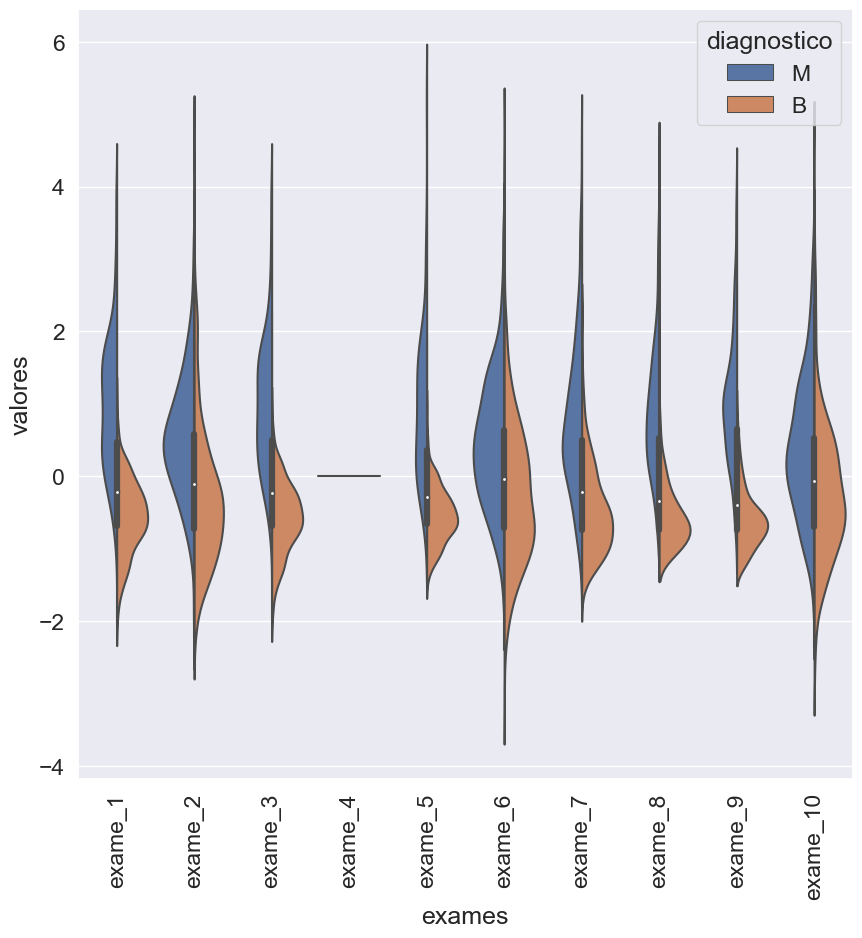

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                 columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]],axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')

plt.figure(figsize=(10, 10))
sns.violinplot(x="exames", y="valores", hue="diagnostico",
               data=dados_plot, split=True)
plt.xticks(rotation=90)

In [66]:
def grafico_violino(valores, inicio, fim):
    
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]],axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                         var_name="exames",
                         value_name='valores')
    
    plt.figure(figsize=(10, 10))
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
                   data = dados_plot, split= True)
    plt.xticks(rotation = 90)

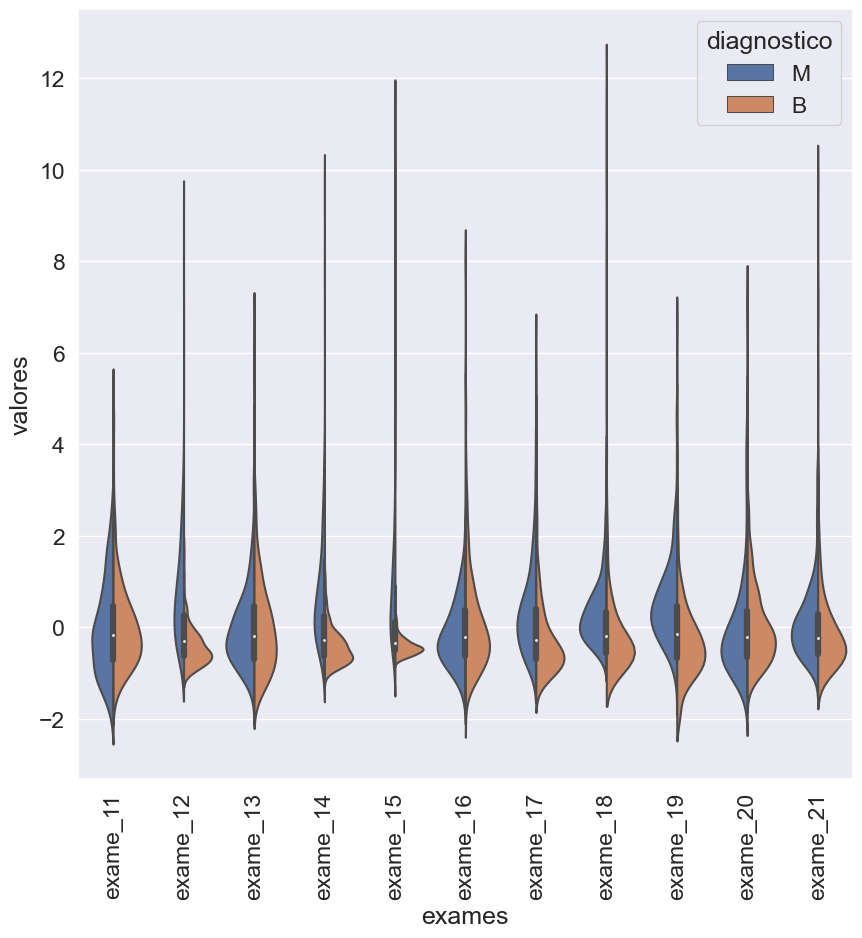

In [67]:
grafico_violino(valores_exames_v2, 10, 21)

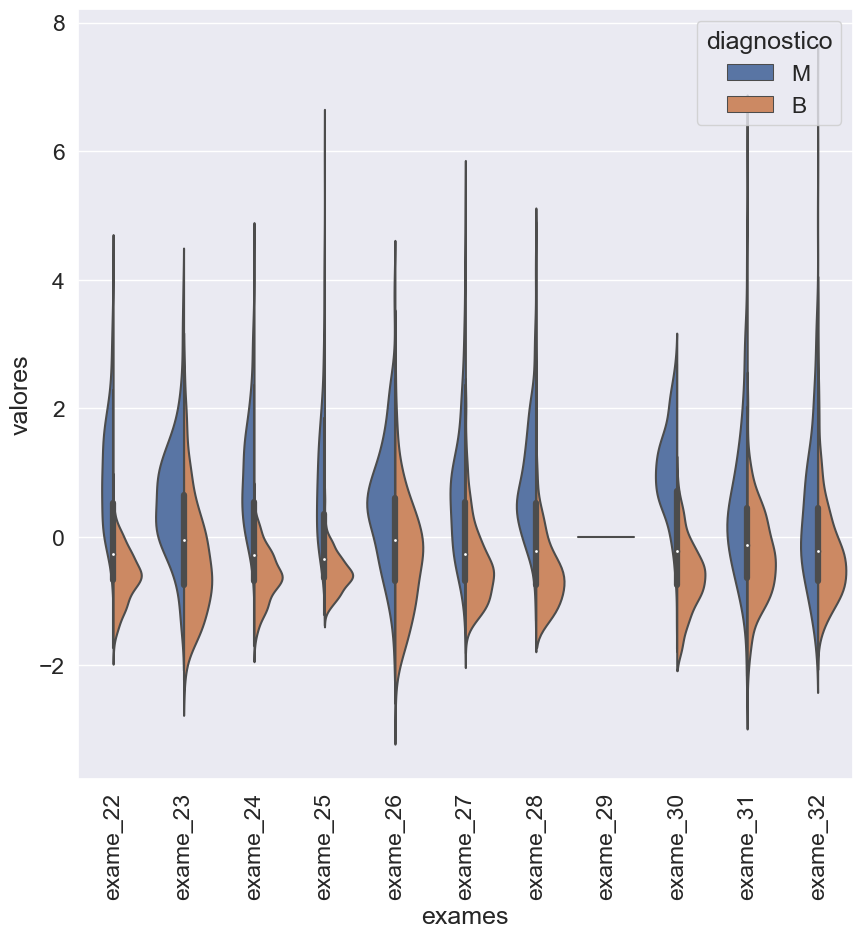

In [68]:
grafico_violino(valores_exames_v2, 21, 32)

Vamos eliminar os exames 4 e 29 e refazer a avaliação do modelo.

In [69]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                        diagnostico,
                                                        test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y)*100))

classificar(valores_exames_v3)

Resultado da classificação 92.98%


## Avaliando a correlação dos exames
Se alguns dos exames possuirem alta correlação poderemos eliminar mais alguns deles.

<Axes: >

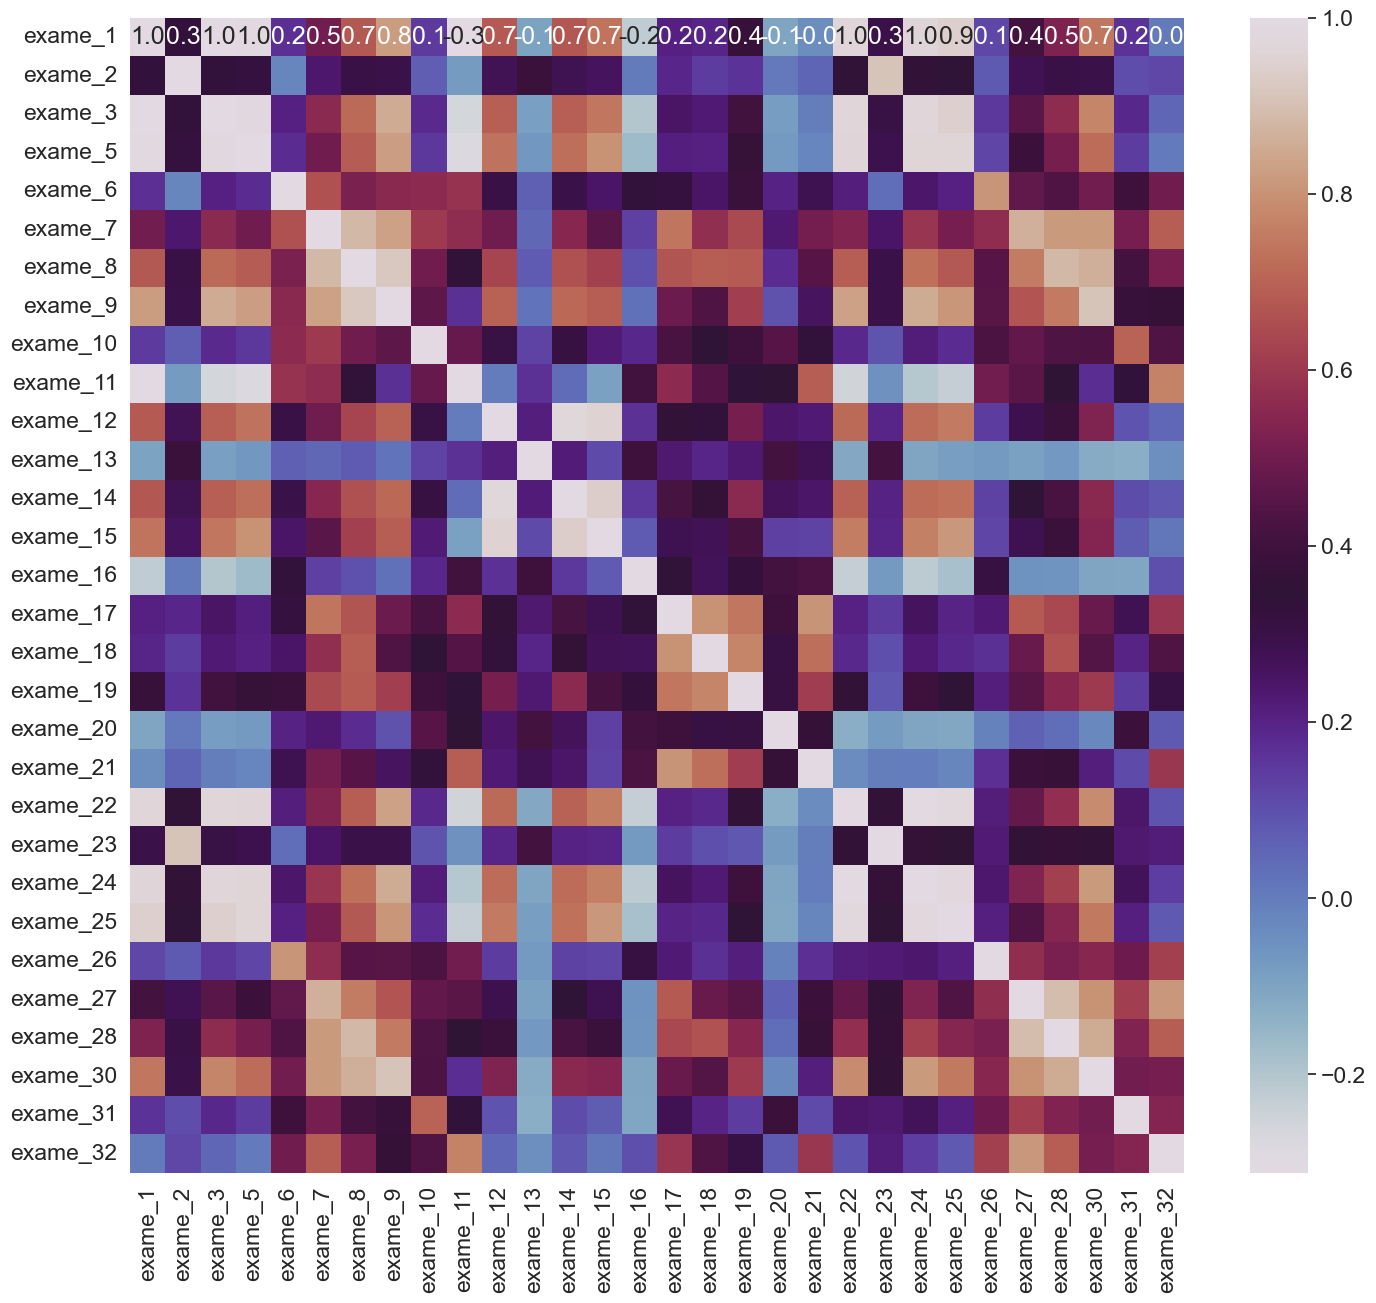

In [70]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".1f", cmap='twilight')

In [71]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.95]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,NaN,...,0.969539,NaN,0.965137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,...,0.969476,NaN,0.970387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,0.987357,NaN,0.986507,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
variaveis_correlacionadas = matriz_correlacao_v1.sum()
variaveis_correlacionadas

exame_1     4.919888
exame_2     1.000000
exame_3     4.924225
exame_5     5.854943
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    2.924624
exame_13    1.000000
exame_14    1.972794
exame_15    1.951830
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    5.879484
exame_23    1.000000
exame_24    5.865929
exame_25    3.920806
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [73]:
variaveis_altamente_correlacionadas = variaveis_correlacionadas[variaveis_correlacionadas > 1]
np.ceil(variaveis_altamente_correlacionadas) - 1

exame_1     4.0
exame_3     4.0
exame_5     5.0
exame_12    2.0
exame_14    1.0
exame_15    1.0
exame_22    5.0
exame_24    5.0
exame_25    3.0
dtype: float64

In [74]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_altamente_correlacionadas.keys())
classificar(valores_exames_v4)

Resultado da classificação 92.40%


## Eliminando variáveis altamente correlacionadas. 
Como elas estão correlacionadas, mesmo eliminando-as da análise ainda consigo um bom resultado na classificação.

In [75]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_5", "exame_22", "exame_24", "exame_25", "exame_14", "exame_15"])
classificar(valores_exames_v5)

Resultado da classificação 92.98%


## Selecionando os principais exames
Dos 33 iniciais exames já eliminamos vários, apesar disso ainda temos muitos exames a serem considerados. A propósta agora é encontrar o mínimo possível que retorne o máximo de confiança.
### SelectKBest
A seguir selecionaremos os cinco melhores exames para prever o diagnóstico. 

In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [77]:
# Valores não normalizados
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_4", "exame_29", "exame_3", "exame_5", "exame_22", "exame_24", "exame_25", "exame_14", "exame_15"]))

In [78]:
SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

selecionar_kmelhores.fit(treino_x,treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [79]:
treino_kbest.shape, teste_kbest.shape

((398, 5), (171, 5))

Mesmo reduzindo os dados para apenas 5 categorias de exames diferentes ainda conseguimos uma taxa de acerto muito boa. Do ponto de visto financeiro e humano para o hospital e para o paciente esse é um excelente resultado pois pode poupar gastos com uma bateria de exames e o transtorno que é ser submetido a essa bateria.

In [80]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_kbest, teste_y)*100))

Resultado da classificação 92.40%


In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

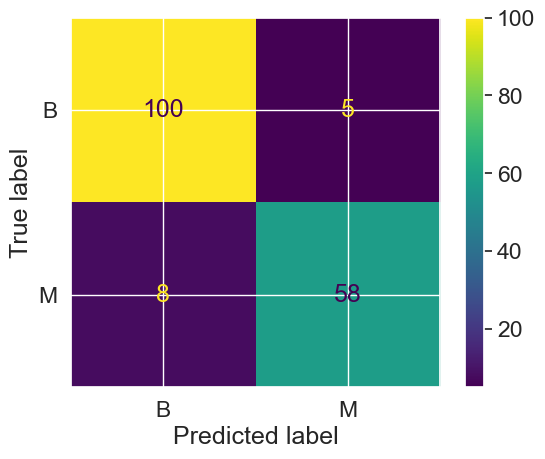

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=classificador.classes_)
disp.plot()
plt.show()

### Recursive Feature Elimination (RFE)
Essa metodologia pontua as categoria mais relevantes e elimina a com menor pontuação. A seguir repete o processo até estarmos com apenas a quantidade de características desejadas.

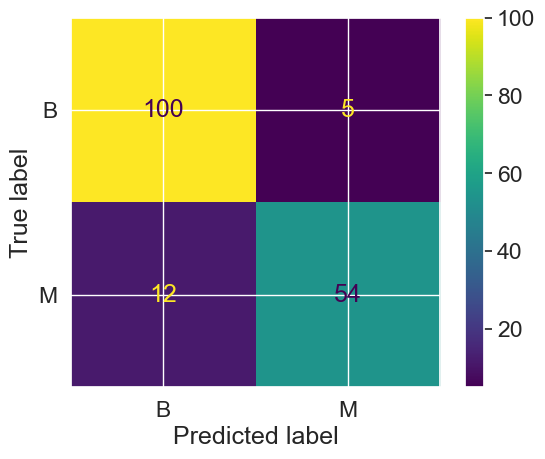

Resultado da classificação 90.06%


In [83]:
from sklearn.feature_selection import RFE

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=classificador.classes_)
disp.plot()
plt.show()
print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

### Recursive Feature Elimination Cross Validation (RFECV)
Semelhante à RFE mas com o acréscimo da validação cruzada. Essa metodologia testa diferentes corpus para o modelo bem como diferentes valores de k para selecionar as categorias.

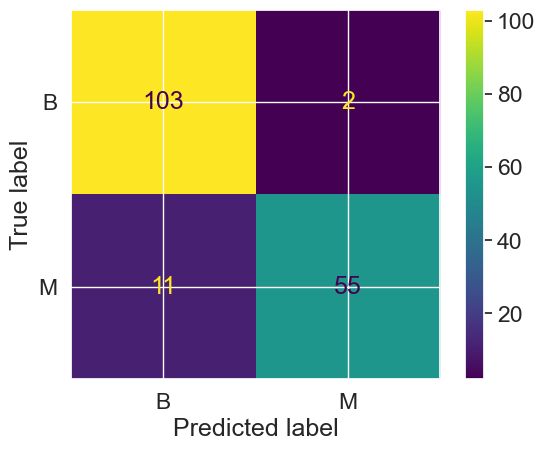

Resultado da classificação 92.40%


In [84]:
from sklearn.feature_selection import RFECV

SEED= 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, 
                                                        diagnostico,
                                                        test_size = 0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_x, treino_y)
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=classificador.classes_)
disp.plot()
plt.show()

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv,teste_y)*100))

As colunas abaixo são as que o RFECV selecionou como mais relevantes. Ele selecionou 8 exames diferentes, mais do que as 5 que havia arbitrariamente especificado.

In [85]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_7', 'exame_8', 'exame_9', 'exame_12', 'exame_23',
       'exame_28', 'exame_30'],
      dtype='object')

In [86]:
selecionador_rfecv.cv_results_

{'mean_test_score': array([0.89686709, 0.92702532, 0.93458861, 0.93468354, 0.94471519,
        0.95224684, 0.95977848, 0.96477848, 0.96227848, 0.96477848,
        0.96227848, 0.95977848, 0.96227848, 0.96477848, 0.96227848,
        0.95977848, 0.96477848, 0.96477848, 0.96477848, 0.96477848,
        0.96227848, 0.96227848, 0.96227848]),
 'std_test_score': array([0.0345458 , 0.02198659, 0.02042564, 0.02150954, 0.01279577,
        0.02157439, 0.01465036, 0.0124237 , 0.01381089, 0.0124237 ,
        0.01381089, 0.01465036, 0.01381089, 0.0124237 , 0.01381089,
        0.00946747, 0.0124237 , 0.0124237 , 0.0124237 , 0.0124237 ,
        0.01381089, 0.01381089, 0.01381089]),
 'split0_test_score': array([0.9375, 0.9375, 0.9375, 0.9   , 0.925 , 0.925 , 0.95  , 0.9625,
        0.9625, 0.9625, 0.9625, 0.95  , 0.9625, 0.9625, 0.95  , 0.9625,
        0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.9625, 0.95  ]),
 'split1_test_score': array([0.9125, 0.925 , 0.9375, 0.9375, 0.95  , 0.95  , 0.95  , 0.9625,
   

In [87]:
(selecionador_rfecv.cv_results_['mean_test_score'])

array([0.89686709, 0.92702532, 0.93458861, 0.93468354, 0.94471519,
       0.95224684, 0.95977848, 0.96477848, 0.96227848, 0.96477848,
       0.96227848, 0.95977848, 0.96227848, 0.96477848, 0.96227848,
       0.95977848, 0.96477848, 0.96477848, 0.96477848, 0.96477848,
       0.96227848, 0.96227848, 0.96227848])

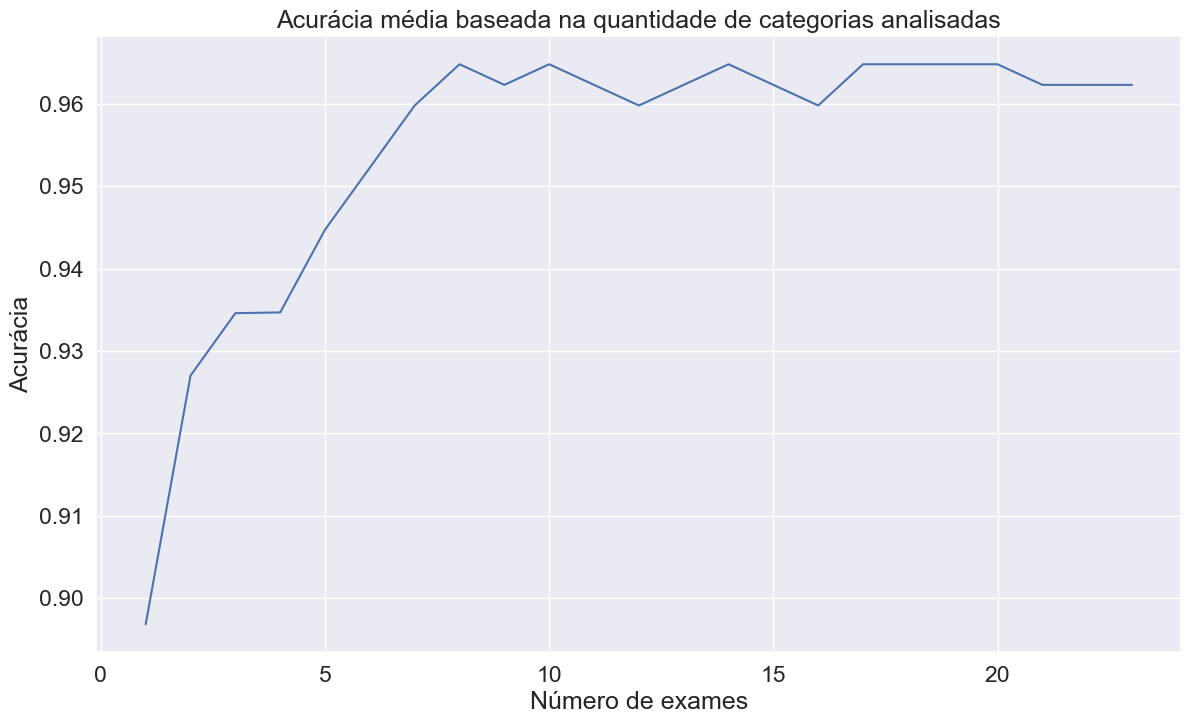

In [88]:
plt.figure(figsize = (14, 8))
plt.title('Acurácia média baseada na quantidade de categorias analisadas')
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) +1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show()

## Visualização dos dados num gráfico

In [113]:
# Selecionando apenas os exames mais relevantes
valores_exames_v7 = selecionador_rfecv.transform(valores_exames_v6)

<Axes: title={'center': 'Visualização dos casos com base nos exames 1 e 7'}, xlabel='exame_1', ylabel='exame_7'>

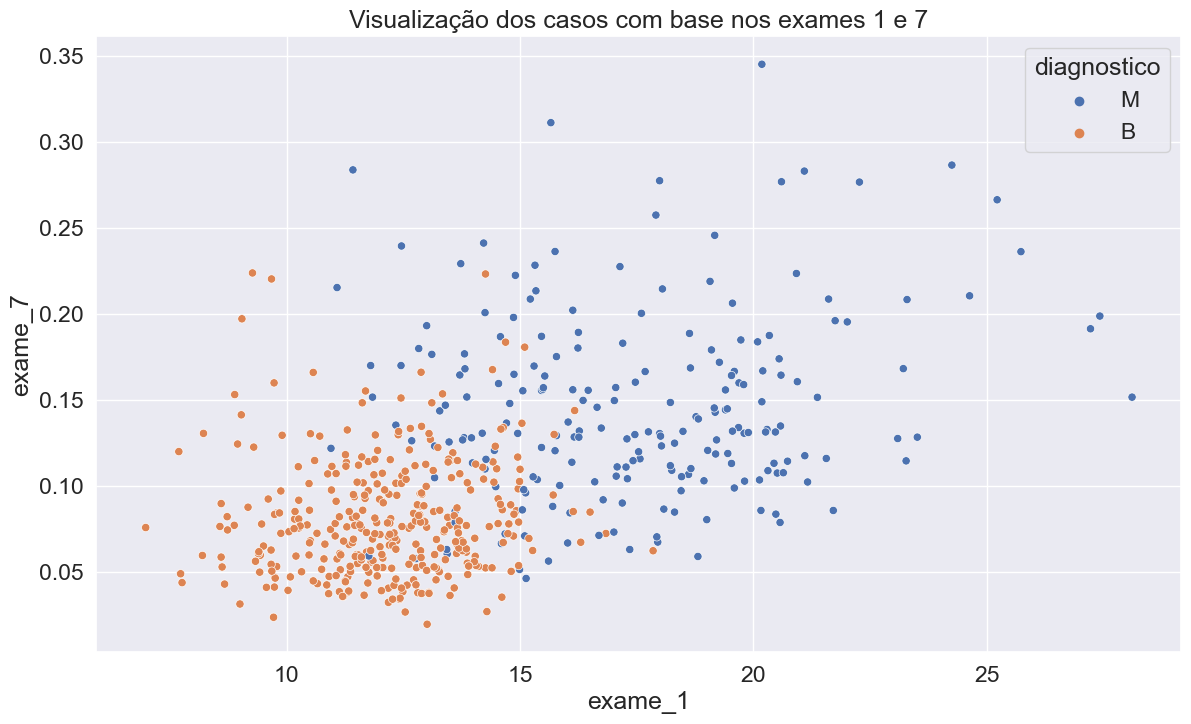

In [105]:
plt.figure(figsize=(14,8))
plt.title('Visualização dos casos com base nos exames 1 e 7')
plt.xlabel('exame_1')
plt.ylabel('exame_7')
sns.scatterplot(x = valores_exames_v7[:,0] , y = valores_exames_v7[:,1], hue = diagnostico)

## Combinando categorias para um visualização mais ampla
Não é possível vermos num único gráfico todas as categorias ao mesmo tempo. Para isso podemos combinar as categorias com os métodos PCA (Principal Component Analysis) ou TSNE (t-Distributed Stochastic Neighbor Embedding).

In [102]:
valores_exames_v5 # últimos dados normalizados

,exame_1,exame_2,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_19,exame_20,exame_21,exame_23,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,0.660820,1.148757,0.907083,-1.359293,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,0.260162,-0.805450,-0.099444,-0.369203,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,1.424827,0.237036,0.293559,-0.023974,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,1.115007,4.732680,2.047511,0.133984,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,1.144205,-0.361092,0.499328,-1.466770,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,...,2.067178,-1.138416,0.167980,0.117700,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,...,0.808431,-0.189161,-0.490556,2.047399,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,...,0.612157,-0.891416,0.036727,1.374854,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,...,0.785721,0.326634,0.904057,2.237926,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


<Axes: >

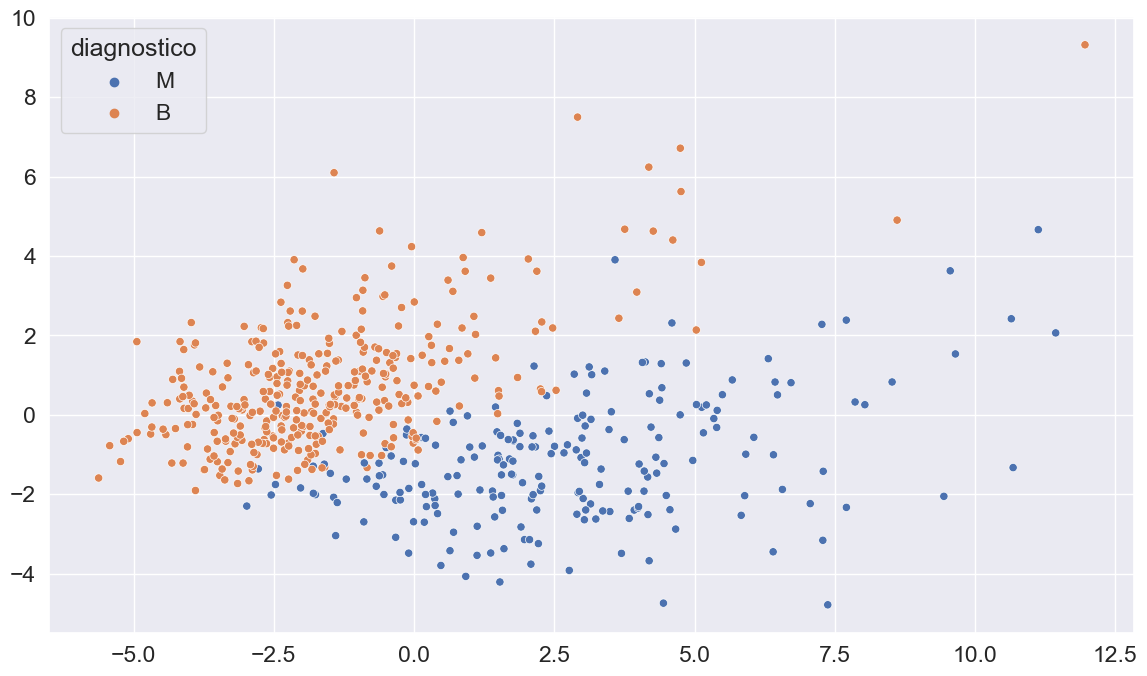

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0] , y = valores_exames_v8[:,1], hue = diagnostico)

<Axes: >

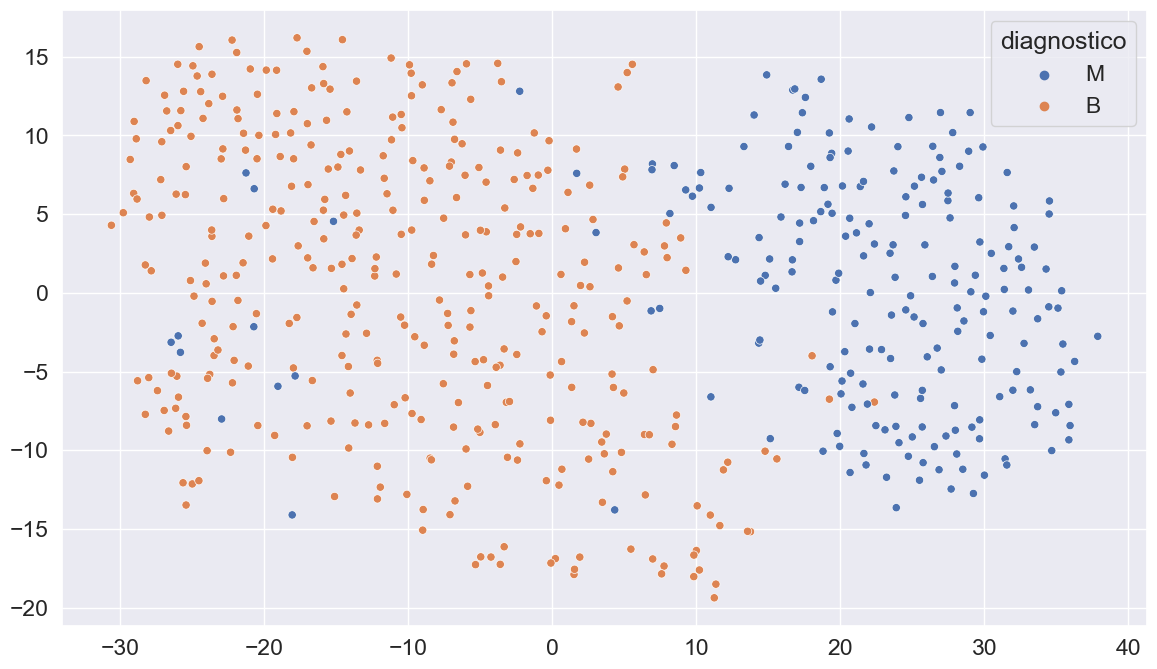

In [104]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v9[:,0] , y = valores_exames_v9[:,1], hue = diagnostico)